QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.02, QasmQobjInstructions = [[{'name': 'x', 'qubits': [0]}]
  P(1) = 0.03, QasmQobjInstructions = [[{'name': 'z', 'qubits': [0]}]
  P(2) = 0.95, QasmQobjInstructions = [[{'name': 'id', 'qubits': [0]}]


C:\Users\Lenovo1\Anaconda3\lib\site-packages\qiskit\circuit\register.py:119: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if not isinstance(key, (int, np.int, np.int32, np.int64, slice, list)):
C:\Users\Lenovo1\Anaconda3\lib\site-packages\qiskit\circuit\register.py:119: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you

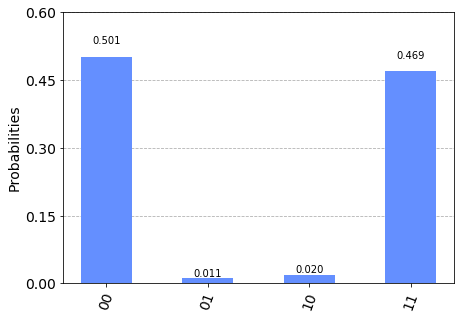

In [153]:
# PROBLEM: Error gate was applied after the Hamdamard gate on qubit 0 and before controlled NOT gate applied on 
# qubit 1 with qubit 0 control qubit. In the histogram it is seen that sometimes output is 01 and 10 which is not
# expected.
import numpy as np
from qiskit import IBMQ, Aer
from qiskit import execute, QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Kraus, SuperOp
from qiskit.providers.aer import QasmSimulator
from qiskit.tools.visualization import plot_histogram

# Import from Qiskit Aer noise module
from qiskit.providers.aer.noise import pauli_error
from qiskit.providers.aer.noise import NoiseModel

#error gate as suggested in task 2
p_error_b = 0.02
p_error_ph = 0.03
Error_gate = pauli_error([('X', p_error_b), ('Z', p_error_ph), ('I', 1 - (p_error_b+p_error_ph))])

#Creating noise model
noise_model = NoiseModel()
#modelling the error with all qubit error applied to hadamard gate on qubit 0 
#and identity gate on qubit 1 as no gate is applied to qubit 1 
noise_model.add_all_qubit_quantum_error(Error_gate, ['h','id']) 
                                                                
#Building the circuit
qr=QuantumRegister(2)
cr=ClassicalRegister(2)
circuit= QuantumCircuit(qr, cr)
circuit.h(qr[0])
circuit.id(1)
circuit.cx(0,1)
circuit.measure([0, 1], [0, 1])


# Get basis gates from noise model
basis_gates = noise_model.basis_gates

# Perform a noise simulation
result = execute(circuit, Aer.get_backend('qasm_simulator'),
                 basis_gates=basis_gates, noise_model=noise_model).result()
counts = result.get_counts(0)
plot_histogram(counts)

C:\Users\Lenovo1\Anaconda3\lib\site-packages\qiskit\circuit\register.py:119: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if not isinstance(key, (int, np.int, np.int32, np.int64, slice, list)):
C:\Users\Lenovo1\Anaconda3\lib\site-packages\qiskit\circuit\register.py:119: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you

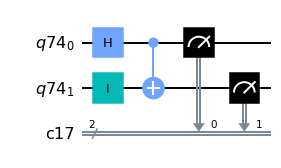

In [79]:
# Visualizing the error prone circuit
circuit.draw('mpl')

QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.02, QasmQobjInstructions = [[{'name': 'x', 'qubits': [0]}]
  P(1) = 0.03, QasmQobjInstructions = [[{'name': 'z', 'qubits': [0]}]
  P(2) = 0.95, QasmQobjInstructions = [[{'name': 'id', 'qubits': [0]}]


C:\Users\Lenovo1\Anaconda3\lib\site-packages\qiskit\circuit\register.py:119: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if not isinstance(key, (int, np.int, np.int32, np.int64, slice, list)):
C:\Users\Lenovo1\Anaconda3\lib\site-packages\qiskit\circuit\register.py:119: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you

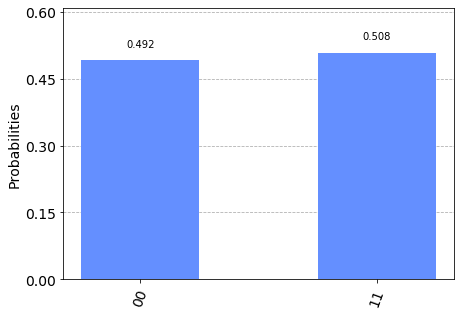

In [165]:
# SOLUTION: We can solve the above problem by encoding qubit 0 with phase flip code 
# as qubit 0 is in superposition state therefore is immune to 'X' error and prone to 'Z' error
# and qubit 1 is in zero state therefore is immune to 'Z' error and prone to 'X' error. Now the
# histogram is as expected i.e 50% of the time in 00 state and 50% of the time in 11 state and there is 
# not a single instance where the output of the circuit is in 01 or 10 state.

from qiskit import execute, QuantumCircuit, QuantumRegister, ClassicalRegister
import numpy as np
from qiskit import IBMQ, Aer
from qiskit import execute, QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Kraus, SuperOp
from qiskit.providers.aer import QasmSimulator
from qiskit.tools.visualization import plot_histogram

#error gate as suggested in task 2
p_error_b = 0.02
p_error_ph = 0.03
Error_gate = pauli_error([('X', p_error_b), ('Z', p_error_ph), ('I', 1 - (p_error_b+p_error_ph))])
print(Error_gate)

#Creating noise model
noise_model = NoiseModel()
noise_model.add_nonlocal_quantum_error(Error_gate,['id'],[0],[3]) # Error gate is applied in the circuit as noisy identity gate


q = QuantumRegister(6,'q')
c = ClassicalRegister(2,'c')

circuit1 = QuantumCircuit(q,c)

circuit1.h(q[0])
# Encoding the qubit 0 with phase flip code
# Encoding circuit
circuit1.cx(q[0],q[1])
circuit1.cx(q[0],q[2])
circuit1.h(q[0])
circuit1.h(q[1])
circuit1.h(q[2])
circuit1.id(q[0]) # noisy identity gate modelling the error gate as described in the problem
circuit1.h(q[0])
circuit1.h(q[1])
circuit1.h(q[2])
# Decoding circuit
circuit1.cx(q[0],q[1])
circuit1.cx(q[0],q[2])
circuit1.ccx(q[2],q[1],q[0])
# Encoding the qubit 1 with bit flip code, in this circuit it is qubit 3
#Encoding circuit
circuit1.cx(q[3],q[4])
circuit1.cx(q[3],q[5])
circuit1.id(q[3]) # noisy identity gate modelling the Error gate as described in the problem
# Decoding circuit
circuit1.cx(q[3],q[4])
circuit1.cx(q[3],q[5])
circuit1.ccx(q[5],q[4],q[3])

#Now applying the controlled NOT gate between the error corrected qubits 0 and 3
circuit1.cx(q[0],q[3])

# Measuring the error corrected the qubits 0 and 3 and storing them in classical bit 0 and 1
circuit1.measure([0, 3], [0, 1])

# Get basis gates from noise model
basis_gates = noise_model.basis_gates

# Perform a noise simulation
result = execute(circuit, Aer.get_backend('qasm_simulator'),
                 basis_gates=basis_gates,
                 noise_model=noise_model).result()
counts = result.get_counts(0)
plot_histogram(counts)

C:\Users\Lenovo1\Anaconda3\lib\site-packages\qiskit\circuit\register.py:119: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if not isinstance(key, (int, np.int, np.int32, np.int64, slice, list)):
C:\Users\Lenovo1\Anaconda3\lib\site-packages\qiskit\circuit\register.py:119: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you

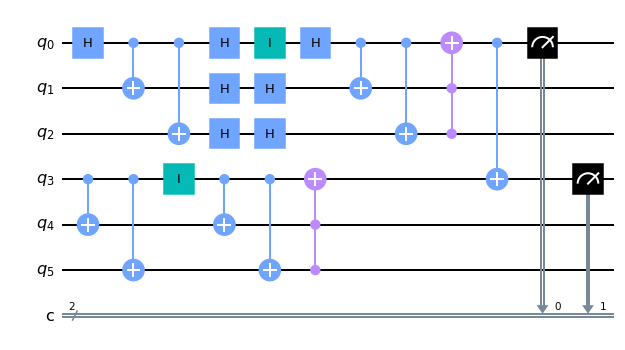

In [164]:
# Visualizing the error corrected circuit
circuit1.draw('mpl')